Inferential Statistics Tutorial Using the Wine Dataset in Python

Inferential statistics allow us to make inferences or predictions about a population based on a sample of data. 

In this tutorial, we will use the Wine dataset to demonstrate how to perform inferential statistical analysis. 

The Wine dataset contains the results of a chemical analysis of wines grown in a specific region of Italy, with 13 features describing the chemical properties of the wine and a target variable indicating the wine class.

We will use Python libraries such as pandas, numpy, scipy, statsmodels, and matplotlib to perform the analysis.

Import Libraries

First, let's import the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

Load the Wine Dataset

The Wine dataset is available in the scikit-learn library. 

Let's load it and convert it into a pandas DataFrame for easier manipulation.

In [2]:
# Load the Wine dataset
wine = load_wine()

# Convert to pandas DataFrame
df = pd.DataFrame(wine.data, columns=wine.feature_names)

# Add the target column to the DataFrame
df['target'] = wine.target

# Display the first few rows of the dataset
print(df.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

Hypothesis Testing

Hypothesis testing is a key component of inferential statistics. 

We will perform some common hypothesis tests on the Wine dataset.

T-Test: Comparing Means of Two Groups

A t-test is used to compare the means of two groups. 
Let's compare the mean alcohol content of two wine classes (e.g., class 0 and class 1).

In [3]:
# Extract alcohol content for class 0 and class 1
alcohol_class_0 = df[df['target'] == 0]['alcohol']
alcohol_class_1 = df[df['target'] == 1]['alcohol']

# Perform an independent t-test
t_stat, p_value = stats.ttest_ind(alcohol_class_0, alcohol_class_1)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in alcohol content between the two classes.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in alcohol content between the two classes.")

T-statistic: 16.478551495156527, P-value: 1.9551698789379198e-33
Reject the null hypothesis: There is a significant difference in alcohol content between the two classes.


ANOVA: Comparing Means of Multiple Groups

ANOVA (Analysis of Variance) is used to compare the means of three or more groups. Let's compare the mean alcohol content across all three wine classes.

In [4]:
# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(
    df[df['target'] == 0]['alcohol'],
    df[df['target'] == 1]['alcohol'],
    df[df['target'] == 2]['alcohol']
)
print(f"F-statistic: {f_stat}, P-value: {p_value}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in alcohol content among the classes.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in alcohol content among the classes.")

F-statistic: 135.07762424279912, P-value: 3.319503795619655e-36
Reject the null hypothesis: There is a significant difference in alcohol content among the classes.


Confidence Intervals

Confidence intervals provide a range of values within which we can be fairly confident (e.g., 95%) that the true population parameter lies.

Confidence Interval for the Mean

Let's calculate the 95% confidence interval for the mean alcohol content.

In [5]:
# Calculate the 95% confidence interval for alcohol content
confidence_interval = stats.t.interval(
    0.95,  # Confidence level
    len(df['alcohol']) - 1,  # Degrees of freedom
    loc=df['alcohol'].mean(),  # Sample mean
    scale=stats.sem(df['alcohol'])  # Standard error of the mean
)
print(f"95% Confidence Interval for Alcohol Content: {confidence_interval}")

95% Confidence Interval for Alcohol Content: (12.880535136274652, 13.120700818781529)


Correlation and Regression Analysis

Correlation and regression analysis help us understand the relationship between variables.

Pearson Correlation

Let's calculate the Pearson correlation coefficient between alcohol content and malic acid.

In [6]:
# Calculate Pearson correlation coefficient
corr_coef, p_value = stats.pearsonr(df['alcohol'], df['malic_acid'])
print(f"Pearson Correlation Coefficient: {corr_coef}, P-value: {p_value}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant correlation between alcohol content and malic acid.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation between alcohol content and malic acid.")

Pearson Correlation Coefficient: 0.09439694091041399, P-value: 0.21008198597074274
Fail to reject the null hypothesis: There is no significant correlation between alcohol content and malic acid.


Linear Regression

Let's perform a simple linear regression to predict alcohol content based on malic acid.

In [8]:
# Fit a linear regression model
X = df['malic_acid']
y = df['alcohol']
X = sm.add_constant(X)  # Add a constant term for the intercept
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                alcohol   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.582
Date:                Mon, 17 Mar 2025   Prob (F-statistic):              0.210
Time:                        15:03:12   Log-Likelihood:                -214.17
No. Observations:                 178   AIC:                             432.3
Df Residuals:                     176   BIC:                             438.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8403      0.141     90.971      0.0

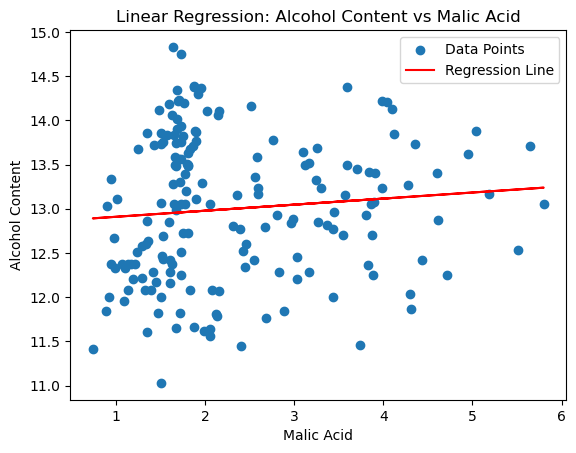

In [9]:
# Plot the regression line
plt.scatter(df['malic_acid'], df['alcohol'], label='Data Points')
plt.plot(df['malic_acid'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('Malic Acid')
plt.ylabel('Alcohol Content')
plt.title('Linear Regression: Alcohol Content vs Malic Acid')
plt.legend()
plt.show()

Chi-Square Test for Categorical Data

The chi-square test is used to determine if there is a significant association between two categorical variables. Let's test if the wine class is independent of a binned version of alcohol content.

Create Bins for Alcohol Content

In [10]:
# Create bins for alcohol content
df['alcohol_bin'] = pd.cut(df['alcohol'], bins=3, labels=['Low', 'Medium', 'High'])

Perform Chi-Square Test

In [11]:
# Create a contingency table
contingency_table = pd.crosstab(df['target'], df['alcohol_bin'])

# Perform the chi-square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-square Statistic: {chi2_stat}, P-value: {p_value}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant association between wine class and alcohol content.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between wine class and alcohol content.")

Chi-square Statistic: 98.85900654714656, P-value: 1.7207753472322594e-20
Reject the null hypothesis: There is a significant association between wine class and alcohol content.
